The MNIST dataset is a large database of handwritten digits that is commonly used for training various image processing systems. It is one of the most popular datasets used in the field of machine learning and computer vision.

The dataset contains 60,000 training images and 10,000 testing images of handwritten digits (0-9), each image is a 28x28 grayscale image. The images are already centered and normalized, so they can be fed directly into a neural network for training.

The MNIST dataset is widely used as a benchmark for evaluating the performance of machine learning algorithms and neural networks. It is an ideal dataset for beginners to start with, as it is relatively simple and easy to understand, yet it provides a good introduction to the basics of image recognition and machine learning.

You can easily download the MNIST dataset from the following link: http://yann.lecun.com/exdb/mnist/. It is also included in Tensorflow's datasets.

# Train a model us MNIST dataset

In [37]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Create a convolutional neural network model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint("mnist.keras"),
]

# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2, callbacks=callbacks)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8420 - loss: 0.5104 - val_accuracy: 0.9778 - val_loss: 0.0692
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9807 - loss: 0.0623 - val_accuracy: 0.9841 - val_loss: 0.0553
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9871 - loss: 0.0407 - val_accuracy: 0.9877 - val_loss: 0.0433
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9909 - loss: 0.0303 - val_accuracy: 0.9873 - val_loss: 0.0442
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9922 - loss: 0.0245 - val_accuracy: 0.9869 - val_loss: 0.0417
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9931 - loss: 0.0195 - val_accuracy: 0.9889 - val_loss: 0.0363
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9959 - loss: 0.0137 - val_accuracy: 0.9893 - val_loss: 0.0402
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9959 - loss: 0.0121 - val_accuracy: 0.

# Run inference using saved model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


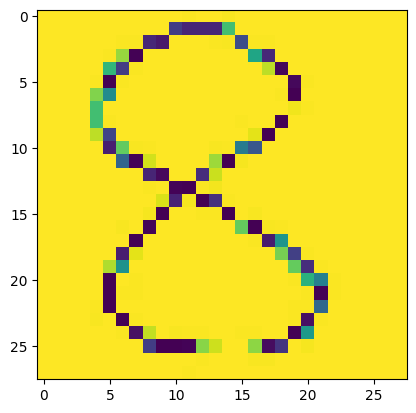

In [38]:
model_file = "mnist.keras"

model = keras.models.load_model(model_file)
img = keras.utils.load_img("data/eight.jpg")
img = tf.image.resize(img, (28, 28))
img = tf.image.rgb_to_grayscale(img)
plt.imshow(img)

img_array = keras.utils.img_to_array(img)
img_array = keras.ops.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
print(predictions)